In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from funciones_auxiliares import *
import warnings
warnings.filterwarnings('ignore')

# 2.2 Diccinario de plantillas

El *Diccionario de plantillas* es la estructura ideada para el almacenamiento de las plantillas de jugadores que participaron entre las temporadas *2019-2020* hasta la temporada *2022-2023* junto a información de cada uno de los jugadores. A través de este notebook, se dará explicación de donde ha sido sacada la información y que estructura e información es almacenada dentro del diccionario mediante los siguientes puntos:
1. **Descripción del portal web.** Se hará una revisión de la información que es almacenada dentro del portal y de la que ha sido seleccionada para la construcción del diccionario y la forma de descarga de la información.
2. **Revisión de estructura del diccionario.** Será mostrada la estructura y tipo de información que es almacenada dentro del diccionario.
3. **Análisis exploratorio.** Será realizado un breve análisis exploratorio en el que serán revisados diferentes puntos de interés referentes al diccionario para la comprensión de los datos descargados.

A través de esos puntos se realizará la comprensión y entendimiento del trabajo realizado para la descarga de este diccionario.

## 1. Descripción del portal web

Para la construcción del *Diccionario de plantillas* ha sido utilizada la página web https://www.acb.com/club/index/temporada_id/ la cual es la sección de clubes dentro de la página oficial de la liga ACB en la que se publican las noticias, resultado, clasificaciones y clubes participantes de la liga. Esta página web, que ha sido como la utilizada para la descarga de las plantillas tiene la siguiente estructura:

![imagen](imagenes/ACB_EQUIPOS_TEMPORADA.png)

Como se puede observar, dentro de esta página web, encontramos dos despegables que permiten por un lado la selección de la competición a visualizar las plantillas y por otro lado la selección de la temporada que se desea visualizar. Además, se puede observar que cada uno de los equipos está representado por su escudo el cual es un botón que dirige al usuario a la página del equipo en la plantilla seleccionada. A modo ilustrativo, se muestra a continuación la plantilla del Barça en la temporada 2022-2023:

![imagen](imagenes/ACB_PLANTILLAS_TEMPORADA.png)

Dentro de la página de un equipo podemos observar diferentes secciones de los integrantes de cada plantilla:
* *Plantilla.* Se muestra cada jugador perteneciente a la plantilla del equipo junto a su dorsal, posición, nombre completo. altura, nacionalidad. edad y pasaporte.
* *Jugadores de categorías inferirores.* Se muestra la información de los jugadores que no pertenecen oficalmente a la plantilla pero que juegan en las categorías inferiores del club y pueden disputar partidos. Para cada jugador se muestra información de su dorsal, posición, nombre completo. altura, nacionalidad. edad y tipo de licencia.
* *Entrenadores.* Se mueestra la información de los entrenadores que dirigen al equipo junto a su nombre, nacionalidad y edad.
* *Jugadores y entrenadores dados de baja.* Se muestra la información de los jugadores y entrenadores que fueron inscritos en la plantilla a lo largo de la temporada pero fueron dado de baja si los hubiese. Junto a cada jugador o entrenador se muestra la información de su dorsal, posición, nacionalidad y tipo de licencia.

Mediante técnicas de web scrapping que permite la interacción con el navegador y la descargar del código fuente de partidos, ha sido descarga la información referente a todas la plantillas de los equipos participante entre las temporadas *2019-2020* hasta la temporada *2022-2023* mediante el script de código [06_Descargar_Info_Jugadores](06_Descargar_Info_Jugadores.py). En este mismo script también se incluye el guardado de la información en el *Diccionario de plantillas* que será mostrado en los siguientes apartados.

## 2. Revisión de estructura del diccionario

Como ha sido comentado en el apartado anterior, en el *Diccionario de plantillas* ha sido almacenada todas las plantillas de los equipos que disputaron la liga ACB entre las temporadas *2019-2020* hasta la temporada *2022-2023*. Durante este apartado, se busca comprender y entender la estructura que ha sido utilizada para el almacenamiento de los partidos. Para ello, se pasa a realiza la carga del diccionario dentro del entorno:

In [2]:
# Ruta al archivo donde se guarda el diccionario
ruta_dicc_plantillas = 'E:/TFM/02. Datos/Trabajo/01. Diccionarios/02_Diccionario_plantillas.json'

# Se realiza la carga del diccionario
with open(ruta_dicc_plantillas, 'r') as archivo:
    diccionario_plantillas = json.load(archivo)      

Tras la carga del diccionario, se pasa a visualizar la estructura del almacenamiento del diccionario. Para este ejemplo de visualización, en primer lugar serán visualizadas las temporadas de las que se tiene información, en segundo lugar la información almacenada en cada una de ellas poniendo de ejemplo la temporada *2022-2023*, en tercer lugar el tipo de información que almacena el *Barça* en esa temporada y, por último, la información del jugador *Álex Abrines* en esa temporada y equipo:

In [3]:
print("\n#####################################################################################")
l_temporadas = list(diccionario_plantillas.keys())
print("# INFORMACION REFERENTE A LAS TEMPORADAS DESCARGADAS")
print("#####################################################################################")
for temporada in l_temporadas:
    print("Temporada:",temporada)

print("\n#####################################################################################")
temporada = '2022'
l_equipos = list(diccionario_plantillas[temporada].keys())
print("# INFORMACION REFERENTE A LA TEMPORADA",temporada)
print("#####################################################################################")
for equipo in l_equipos:
    print("Equipo almacenado:",equipo)

print("\n#####################################################################################")
temporada = '2022'
equipo = 'Barça'
print("# INFORMACION REFERENTE AL",equipo, "en la temporada",temporada)
print("#####################################################################################")

url_equipo = diccionario_plantillas[temporada][equipo]['url_equipo']
l_jugadores = list(diccionario_plantillas[temporada][equipo]['plantilla'].keys())

print("La url_equipo es:", url_equipo)
print("\nLa plantilla del", equipo, "en la temporada", temporada)

for jugador in l_jugadores:
    print("Jugador:",jugador)

print("\n#####################################################################################")
temporada = '2022'
equipo = 'Barça'
jugador = 'Álex Abrines'
l_elem = list(diccionario_plantillas[temporada][equipo]['plantilla'][jugador].keys())
print("# INFORMACION REFERENTE A", jugador, "en la temporada",temporada)
print("#####################################################################################")

for elem in l_elem:
    valor = diccionario_plantillas[temporada][equipo]['plantilla'][jugador][elem]
    print("-",elem,"-",valor)


#####################################################################################
# INFORMACION REFERENTE A LAS TEMPORADAS DESCARGADAS
#####################################################################################
Temporada: 2019
Temporada: 2020
Temporada: 2021
Temporada: 2022

#####################################################################################
# INFORMACION REFERENTE A LA TEMPORADA 2022
#####################################################################################
Equipo almacenado: Barça
Equipo almacenado: Cazoo Baskonia
Equipo almacenado: Bàsquet Girona
Equipo almacenado: BAXI Manresa
Equipo almacenado: Carplus Fuenlabrada
Equipo almacenado: Casademont Zaragoza
Equipo almacenado: Coviran Granada
Equipo almacenado: Dreamland Gran Canaria
Equipo almacenado: Joventut Badalona
Equipo almacenado: Lenovo Tenerife
Equipo almacenado: Monbus Obradoiro
Equipo almacenado: Real Betis Baloncesto
Equipo almacenado: Real Madrid
Equipo almacenado: Río Breogán
Eq

Como puede observarse, en el diccionario se almacena información de las plantillas de los distintos equipos que participaron en la liga ACB desde la temporada *2019-2020* hasta la temporada *2022-2023*. En cada uno de los equipo es almacenada por una lado la url de acceso a la plantilla del equipo y por otro lado la información de los jugadores que conformaron la plantilla excluyendo a los entrenadores. Por último, para cada uno de los jugadores es almacenada la información de su dorsal, altura y posición junto a la página del jugador dentro de la liga. 

Una vez comentada la estructura del diccionario, se pasa a visualizar la estructura de equipos y jugadores en cada una de la temporadas:

In [4]:
print("#####################################################################################")
print("# INFORMACION REFERENTE AL DICCIONARIO")
print("#####################################################################################\n")

l_temporadas = list(diccionario_plantillas.keys())

for temporada in l_temporadas:
    print("* En el diccionario se almacena información de la temporada:",temporada)
    l_equipos = list(diccionario_plantillas[temporada].keys())
    print("\t+ El número de equipos que se almacenan en la temporada es:", len(l_equipos))
    num_jugadores = 0
    for equipo in l_equipos:
        num_jugadores = num_jugadores + len(list(diccionario_plantillas[temporada][equipo]['plantilla'].keys()))
    
    print("\t+ El número de jugadores que se almacenan en la temporada es:", num_jugadores,"\n")

#####################################################################################
# INFORMACION REFERENTE AL DICCIONARIO
#####################################################################################

* En el diccionario se almacena información de la temporada: 2019
	+ El número de equipos que se almacenan en la temporada es: 18
	+ El número de jugadores que se almacenan en la temporada es: 320 

* En el diccionario se almacena información de la temporada: 2020
	+ El número de equipos que se almacenan en la temporada es: 19
	+ El número de jugadores que se almacenan en la temporada es: 366 

* En el diccionario se almacena información de la temporada: 2021
	+ El número de equipos que se almacenan en la temporada es: 18
	+ El número de jugadores que se almacenan en la temporada es: 328 

* En el diccionario se almacena información de la temporada: 2022
	+ El número de equipos que se almacenan en la temporada es: 18
	+ El número de jugadores que se almacenan en la temporada es

Como puede observarse el número de equipos en la temporadas *2019-2020*, *2020-2021* y *2021-2022* es de 18 mientras que en la temporada *2022-2023* el número de equipo es de 19 debido a que solo hubo un único descenso la temporada anterior debido a la pandemia del Covid-19. Por otro lado, con respecto al volumen de jugador, en la temporada *2022-2023* aumenta debido al aumento de un equipo más y que debido a la pandemia los equipos se vieron obligados a tener una rotación poco habitual de jugadores.

## 3. Análisis exploratorio.

Tras el análisis estructural del diccionario, se pasa a realizar un breve análisis exploratio para conocer la distribución de equipos y jugadores en cada una de las temporadas. Para ello, en primer lugar, se pasa a crear un dataframe que permita la construcción de las visualizaciones:

In [5]:
# Se recorre el diccionario mediante un bucle que permite construir un dataframe a partir de la información almacenada en cada uno de los diccionarios
data = []
l_temporadas = list(diccionario_plantillas.keys())

for temporada in l_temporadas:
    l_equipos = list(diccionario_plantillas[temporada].keys())
    for equipo in l_equipos:
        l_jugadores = list(diccionario_plantillas[temporada][equipo]['plantilla'].keys())
        for jugador in l_jugadores:
            altura = diccionario_plantillas[temporada][equipo]['plantilla'][jugador]['Altura']
            posicion = diccionario_plantillas[temporada][equipo]['plantilla'][jugador]['Posición']
            jugador_info = {"TEMPORADA": temporada, "EQUIPO":equipo, "NOMBRE_JUGADOR":jugador, "ALTURA":altura, "POSICION":posicion}
            data.append(jugador_info)
            
# Construcción de dataframe y visualización de la cabecera de este
df_trabajo = pd.DataFrame(data)            
df_trabajo.head()            

,TEMPORADA,EQUIPO,NOMBRE_JUGADOR,ALTURA,POSICION
0,2019,Barça,Pau Ribas,"1,94 m",Escolta
1,2019,Barça,Adam Hanga,"2,00 m",Alero
2,2019,Barça,Rolands Smits,"2,07 m",Ala-pívot
3,2019,Barça,Thomas Heurtel,"1,89 m",Base
4,2019,Barça,Pierre Oriola,"2,08 m",Ala-pívot


Como primer análisis de distribuciones se pasa a observar el número de equipos y jugadores que disputaron cada una de las temporadas y que son almacenados en el diccionario:

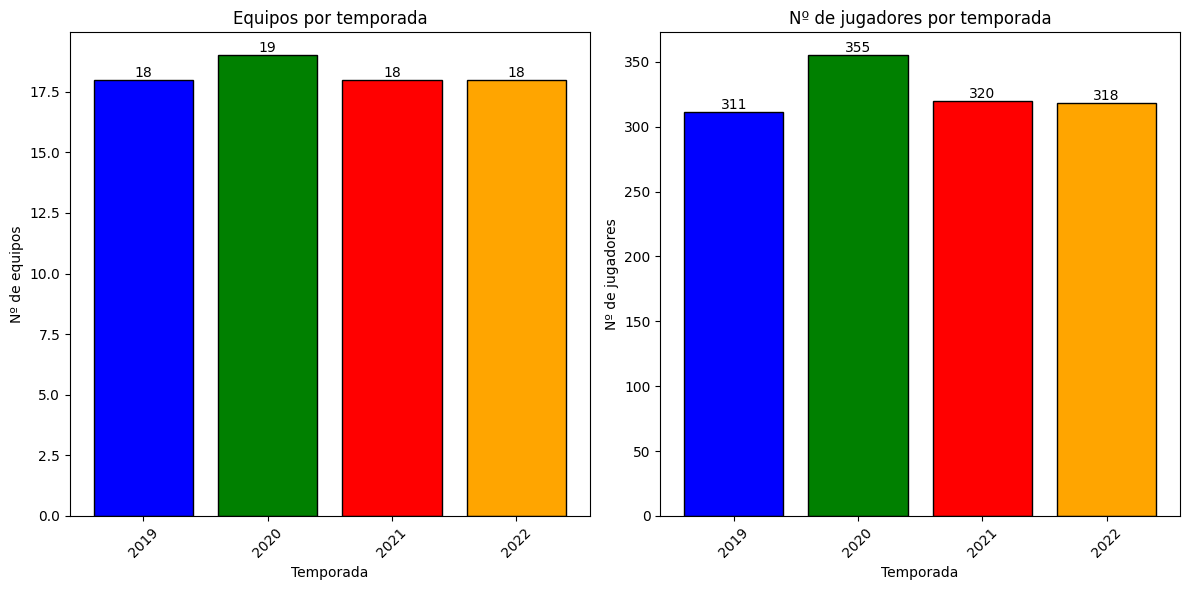

In [6]:
# Se realiza el conteo de equipos y jugadores que dusputaron cada una de las temporadas
df_vol_equipos = df_trabajo[['TEMPORADA','EQUIPO']].drop_duplicates().groupby('TEMPORADA').count().reset_index()
df_vol_jugadores = df_trabajo[['TEMPORADA','NOMBRE_JUGADOR']].drop_duplicates().groupby('TEMPORADA').count().reset_index()

# Se realiza la visualización de la distribución de equipos y jugadores
colores = ['blue', 'green', 'red', 'orange']
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i, temporada in enumerate(df_vol_equipos['TEMPORADA']):
    equipos = df_vol_equipos.loc[df_vol_equipos['TEMPORADA'] == temporada, 'EQUIPO'].iloc[0]
    axs[0].bar(temporada, equipos, color=colores[i], edgecolor='black')
    axs[0].text(temporada, equipos, str(equipos), color='black', ha='center', va='bottom')
axs[0].set_title('Equipos por temporada')
axs[0].set_xlabel('Temporada')
axs[0].set_ylabel('Nº de equipos')
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(False)

for i, temporada in enumerate(df_vol_jugadores['TEMPORADA']):
    jugadores = df_vol_jugadores.loc[df_vol_jugadores['TEMPORADA'] == temporada, 'NOMBRE_JUGADOR'].iloc[0]
    axs[1].bar(temporada, jugadores, color=colores[i], edgecolor='black')
    axs[1].text(temporada, jugadores, str(jugadores), color='black', ha='center', va='bottom')
axs[1].set_title('Nº de jugadores por temporada')
axs[1].set_xlabel('Temporada')
axs[1].set_ylabel('Nº de jugadores')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)

plt.tight_layout()
plt.show()

Como puede observarse, el número de equipos en tres de las cuatro temporadas es de 18 mientras que en la temporada *2020-2021* el número de equipo aumenta a 19 por la pandemia del Covid-19. Por otro lado, el volumen de jugadores aumenta en esta temporada debido al aumento en un equipo y el número de bajas causado por el Covid-19.

Se pasa a visualizar la distribución de jugadores por equipo en cada una de las temporadas que son almacenadas en el diccionario:

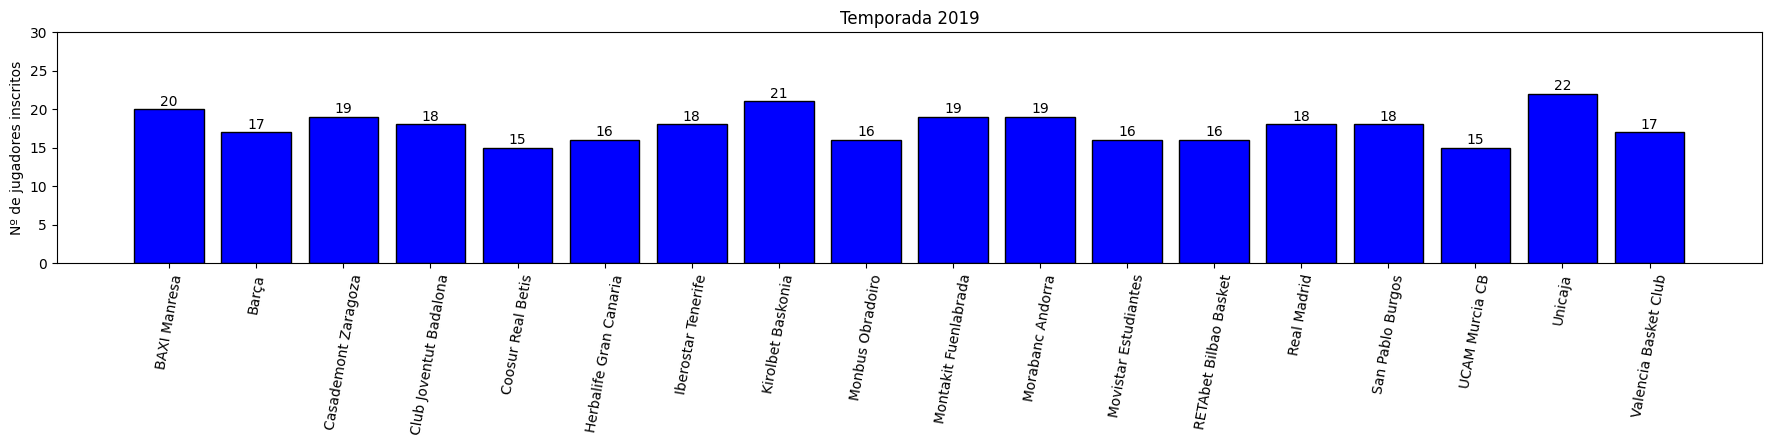

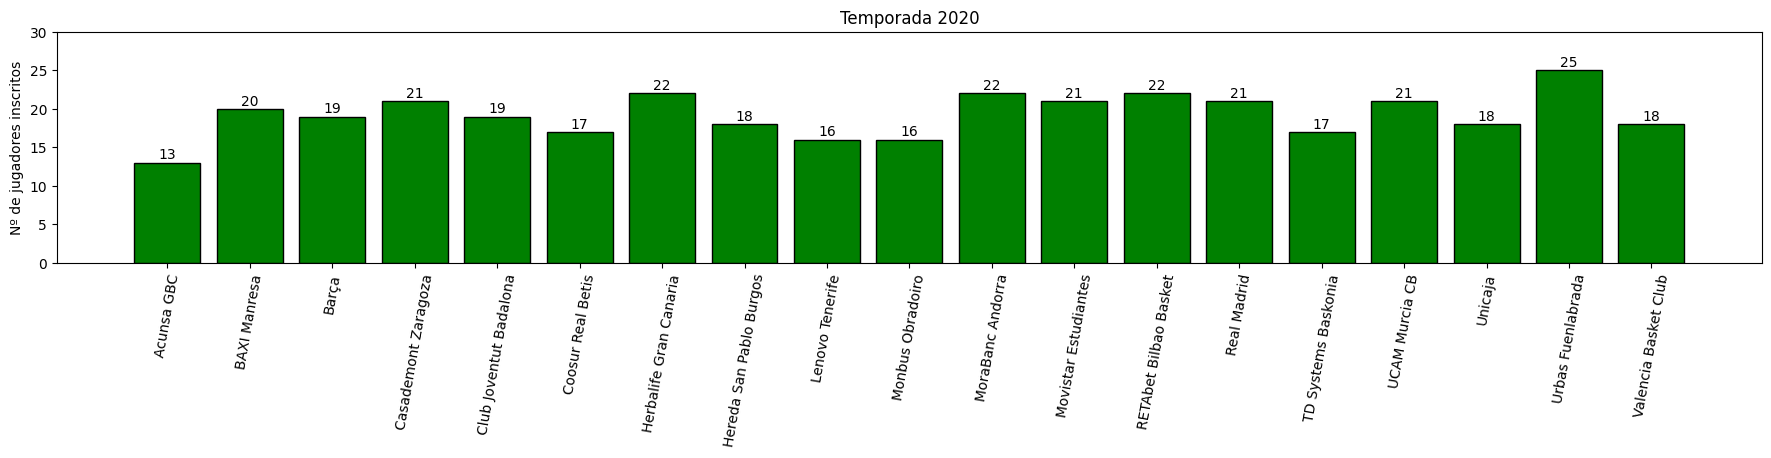

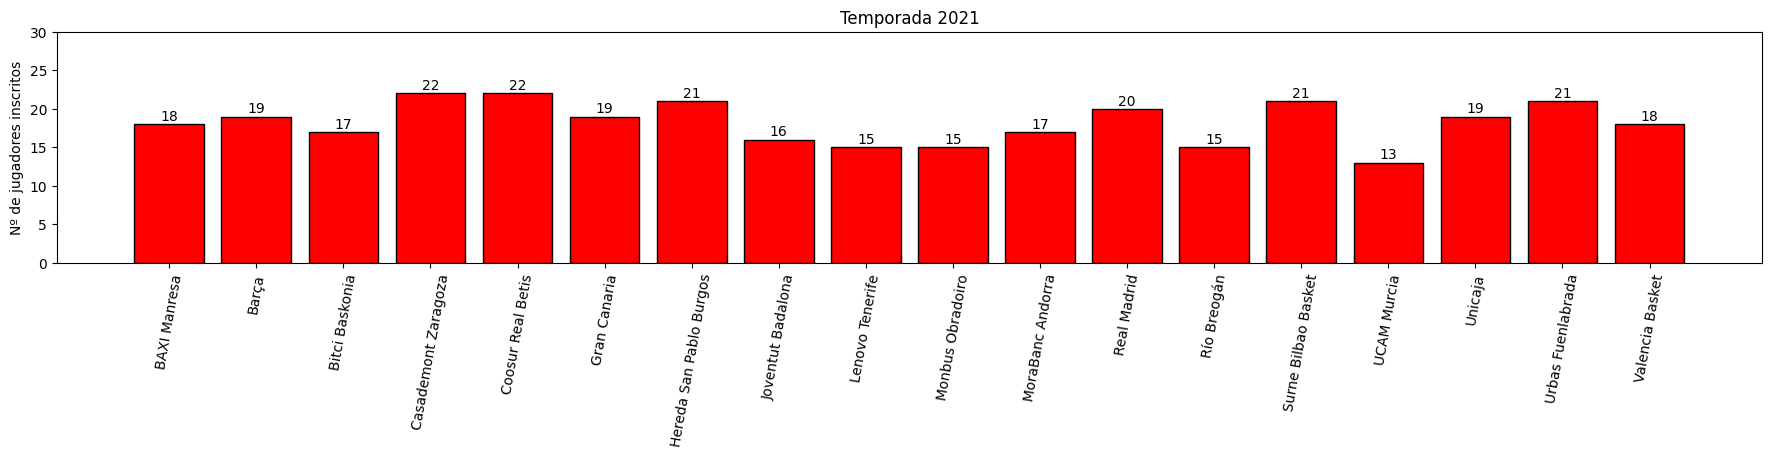

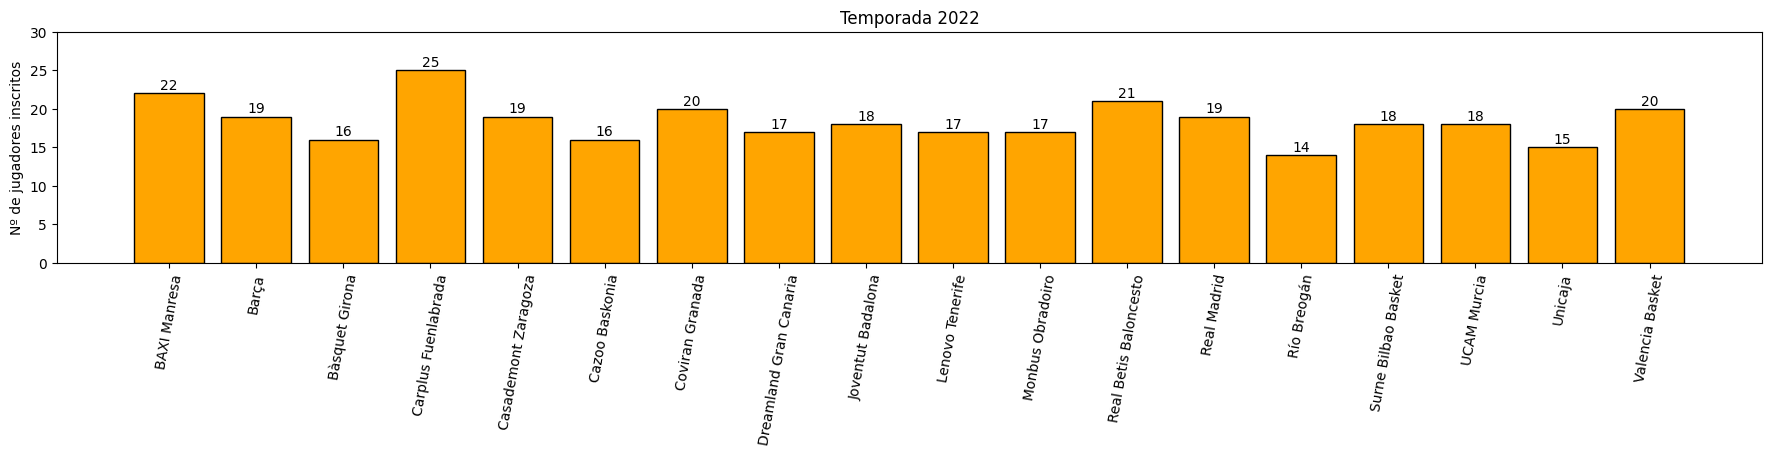

In [7]:
# Se extrae el volumen de jugadores que fueron inscritos en cada uno de los equipos
df_vol_equipo_jugadores = df_trabajo[['TEMPORADA','EQUIPO','NOMBRE_JUGADOR']].groupby(['TEMPORADA','EQUIPO']).count().reset_index()

l_temporadas = list(df_vol_equipo_jugadores.TEMPORADA.unique())
colores = ['blue', 'green', 'red', 'orange']

i = 0
for temporada in l_temporadas:
    generar_visualizacion_barras_jugadores(df_vol_equipo_jugadores[df_vol_equipo_jugadores['TEMPORADA']==temporada],colores[i],temporada)
    i = i + 1 

Como puede observarse, la distribución de jugadores en cada uno de los equipos no es regular debido a que el número de jugadores inscritos a lo largo de una temporada suelen verse afectado por el nivel deportivo del equipo, la situación económica del club o por las lesiones que tuviesen los jugadores durante esas temporadas. Ejemplos de esto podemos encontrar al Carplus Fuenlabrada en la temporada *2022-2023* en el cual hubo una rotación de jugadores muy elevada intentado evitar el descenso. 

Se pasa por último a revisar la volumetría de jugadores por posición en cada una de la temporadas:

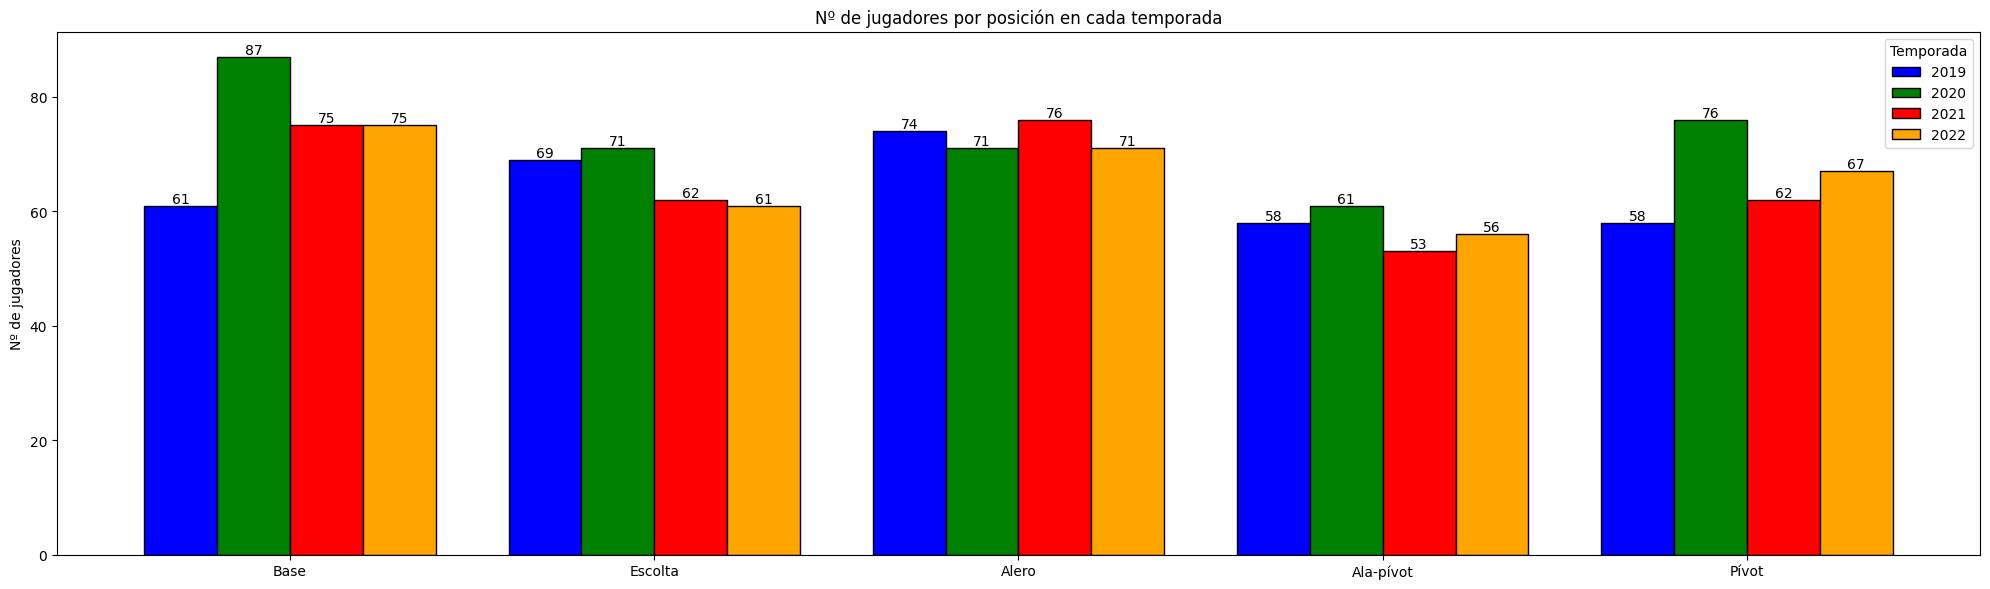

In [8]:
# Se construye calcula el volumen de jugadores por temporada y posición
df_vol_posiciones = df_trabajo[['TEMPORADA','POSICION','NOMBRE_JUGADOR']].groupby(['TEMPORADA','POSICION']).count().reset_index()
df_vol_posiciones = df_vol_posiciones[df_vol_posiciones['POSICION'] != '']

# Definimos el orden deseado de las posiciones y los colores de cada temporada
posiciones_ordenadas = ['Base', 'Escolta', 'Alero', 'Ala-pívot', 'Pívot']
colores = ['blue', 'green', 'red', 'orange']

fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.2
index = np.arange(len(posiciones_ordenadas))

for i, temporada in enumerate(df_vol_posiciones['TEMPORADA'].unique()):
    temp_df = df_vol_posiciones[df_vol_posiciones['TEMPORADA'] == temporada]

    volumenes_temporada = {posicion: 0 for posicion in posiciones_ordenadas}
    for posicion, volumen in zip(temp_df['POSICION'], temp_df['NOMBRE_JUGADOR']):
        if posicion in posiciones_ordenadas:
            volumenes_temporada[posicion] += volumen

    bars = ax.bar(index + i * bar_width, [volumenes_temporada[posicion] for posicion in posiciones_ordenadas], 
                  bar_width, label=str(temporada), color=colores[i], edgecolor='black')

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

ax.set_ylabel('Nº de jugadores')
ax.set_title('Nº de jugadores por posición en cada temporada')
ax.set_xticks(index + bar_width * (len(df_vol_posiciones['TEMPORADA'].unique()) - 1) / 2)
ax.set_xticklabels(posiciones_ordenadas)
ax.legend(title='Temporada')

plt.tight_layout()
plt.show()

Como puede observarse, dentro de la liga, las posiciones de jugadores exteriores son las que más jugadores tienen (Base, Escolta y Alero) siendo predominantes sobre las posiciones interiores. Esto puede deberse a que el ritmo de juego o las necesidades de los equipos no dependan tanto de las posiciones interiores o que el número de jugadores accesibles para la liga en estas posiciones es más reducido.